     Sepal_Length  Sepal_Width  Petal_Length  Petal_Width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[150 rows x 4 columns]


C:\Users\asima\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\asima\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\asima\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Adjusted Rank Index for K-Means: 0.7302
Adjusted Rank Index for GMM: 0.9039


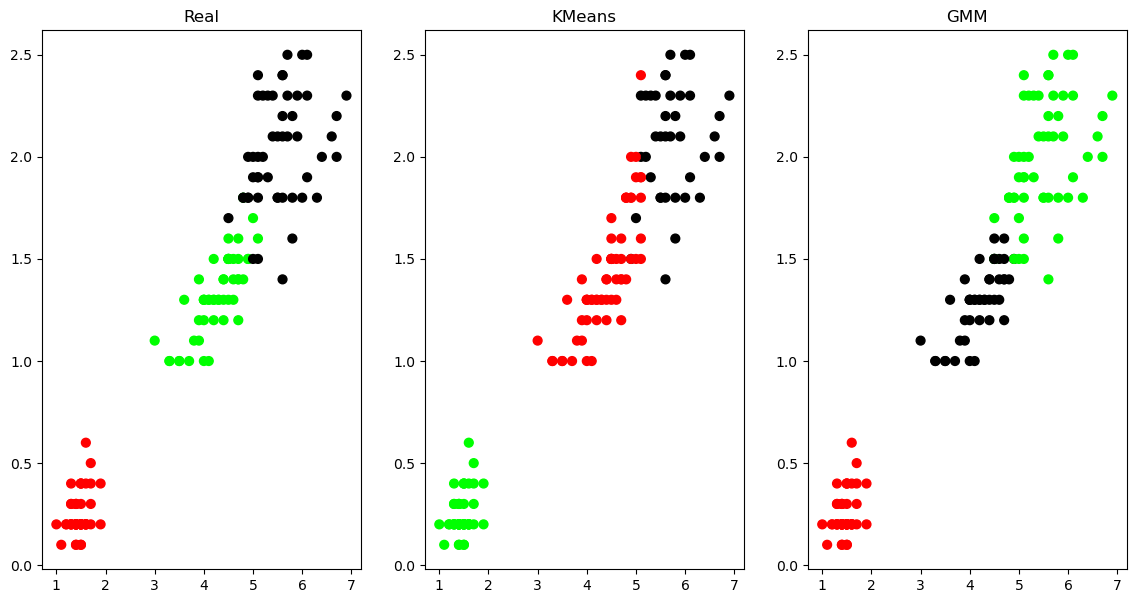

In [30]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import sklearn.metrics as sm

dataset=load_iris()

X=pd.DataFrame(dataset.data)
X.columns=['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width']
y=pd.DataFrame(dataset.target)
y.columns=['Targets']

print(X)
colormap=np.array(['red','lime','black'])
plt.figure(figsize=(14,7))
plt.subplot(1,3,1)
plt.scatter(X.Petal_Length,X.Petal_Width,c=colormap[y.Targets],s=40)
plt.title("Real")


plt.subplot(1,3,2)
model=KMeans(n_clusters=3)
model.fit(X)
y_pred=np.choose(model.labels_,[0,1,2]).astype(np.int64)
plt.scatter(X.Petal_Length,X.Petal_Width,c=colormap[y_pred],s=40)
plt.title("KMeans")

#GMM



scaler=StandardScaler()
scaler.fit(X)

xsa=scaler.transform(X)
xs=pd.DataFrame(xsa,columns=X.columns)
gmm=GaussianMixture(n_components=3)
gmm.fit(xs)

y_cluster_gmm=gmm.predict(xs)
plt.subplot(1,3,3)
plt.scatter(X.Petal_Length,X.Petal_Width,c=colormap[y_cluster_gmm],s=40)
plt.title("GMM")

ari_kMeans=sm.adjusted_rand_score(y.Targets,y_pred)
ari_gmm=sm.adjusted_rand_score(y.Targets,y_cluster_gmm)
print(f"Adjusted Rank Index for K-Means: {ari_kMeans:.4f}")
print(f"Adjusted Rank Index for GMM: {ari_gmm:.4f}")

accuracy_kMeans=np.mean(y.Targets==y_pred)
accuracy_gmm=np.mean(y.Targets==y_cluster_gmm)
plt.show()